<a href="https://colab.research.google.com/github/asmaElouali/EasyOcr-KerasOcr/blob/main/test_ocr_tesseract_easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np

from glob import glob
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('ggplot')

## Outline

1. Take a look at the data
2. Extract text from images :
    . easyocr
    .keras_ocr
3. Run on a few examples and compare the results

In [59]:
annot= pd.read_csv('../content/sample_data/mnist_train_small.csv')
imgs = pd.read_csv('../content/sample_data/california_housing_train.csv')
img_fns=glob('../content/train_data/*')

In [17]:
imgs.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -114.31     34.19                15.0       5612.0          1283.0   
1    -114.47     34.40                19.0       7650.0          1901.0   
2    -114.56     33.69                17.0        720.0           174.0   
3    -114.57     33.64                14.0       1501.0           337.0   
4    -114.57     33.57                20.0       1454.0           326.0   

   population  households  median_income  median_house_value  
0      1015.0       472.0         1.4936             66900.0  
1      1129.0       463.0         1.8200             80100.0  
2       333.0       117.0         1.6509             85700.0  
3       515.0       226.0         3.1917             73400.0  
4       624.0       262.0         1.9250             65500.0

**Plot Exemple Images**

In [18]:
img_id = img_fns[0].split('/')[-1].split('.')[0]

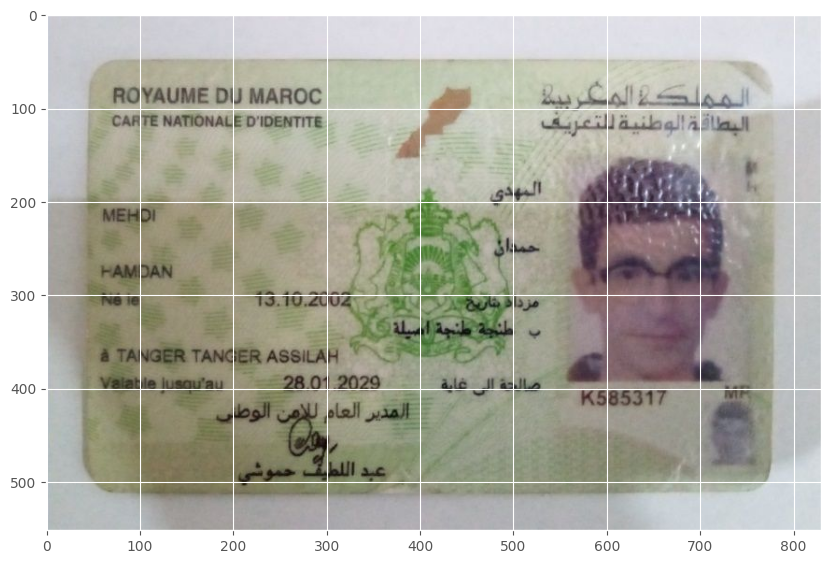

In [19]:
fig, ax = plt.subplots(figsize =(10, 10))
ax.imshow(plt.imread(img_fns[0]))
plt.show()

In [20]:
img_id = img_fns[0].split('/')[-1].split('.')[0]
imgs.query('latitude == latitude')

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  median_house_value  
0          1015.0       472.0         1.4936             66900.0  
1          1129.0       463.0         1.8200             80100.0  
2           333.0       117.0         1.6509             85700.0  
3           515.0       226.0         3.1917             73400.0  
4           624.0       262.0         1.9250             65500.0  
...           ...         ...            ...                 ...  
16995       907.0       369.0         2.3571            111400.0  
16996      1194.0       465.0         2.5179             79000.0  
16997      1244.0       456.0         3.0313            103600.0  
16998      1298.0       478.0         1.9797             85800.0  
16999       806.0       270.0         3.0147             94600.0  

[17000 rows x 9 columns]

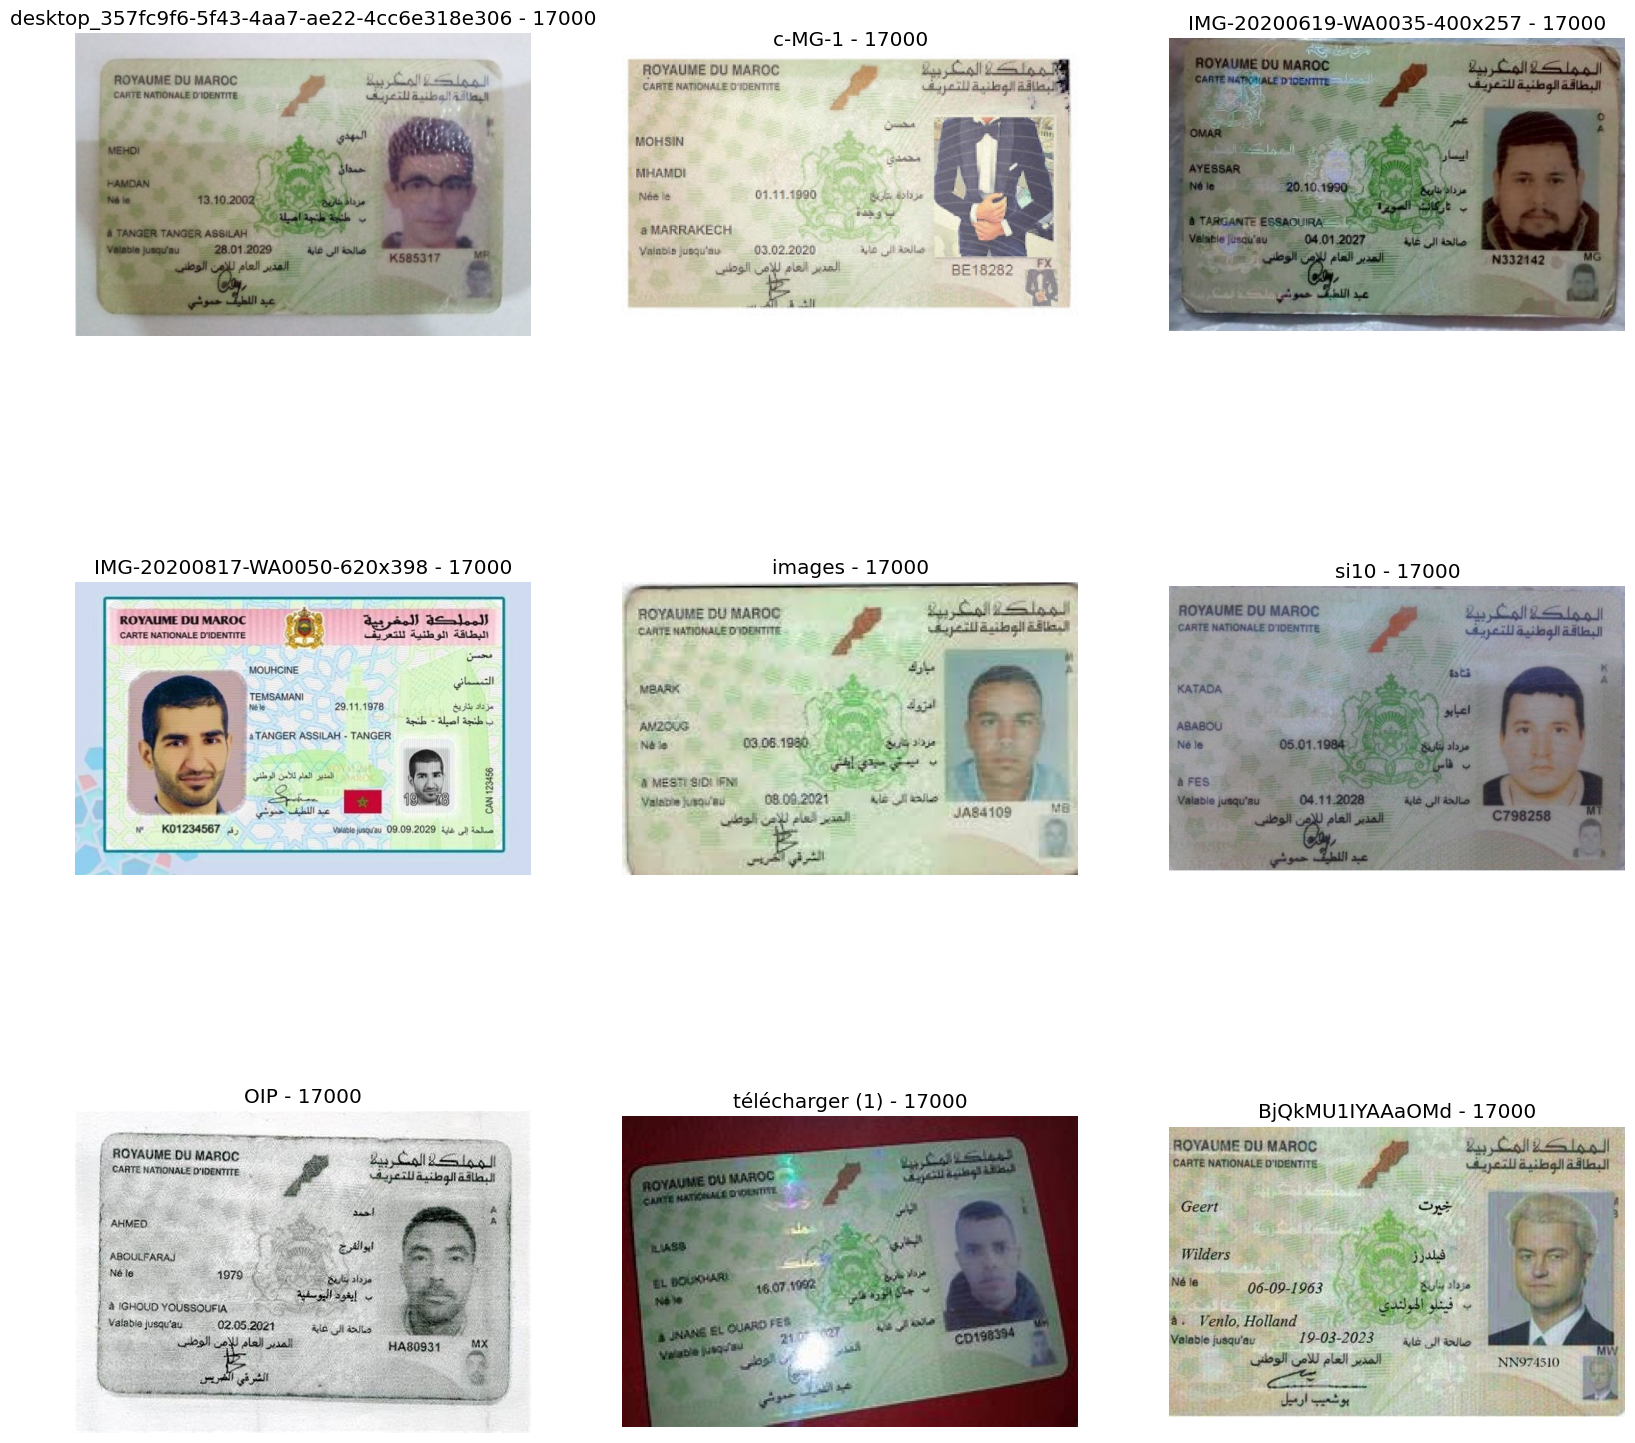

In [27]:
fig, axs = plt.subplots(3,3, figsize=(20, 20))
axs = axs.flatten()
for i in range(9):
    axs[i].imshow(plt.imread(img_fns[i]))
    axs[i].axis('off')
    image_id = img_fns[i].split('/')[-1].rstrip('.jpg')
    n_annot =len(imgs.query('latitude == latitude'))
    axs[i].set_title(f'{image_id} - {n_annot}')
plt.show()

In [31]:
!pip install tesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 MB 21.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562552 sha256=50c11cda8a73f0533d2a2c33eb5026d8e0df356f3a1be013b9018b6cece9344c
  Stored in directory: /root/.cache/pip/wheels/71/c9/aa/698c579693e83fdda9ad6d6f0d8f61ed986e27925ef576f109
Successfully built tesseract


In [33]:
!export PATH=$PATH:/usr/local/bin

# Method 1 : pytesseract

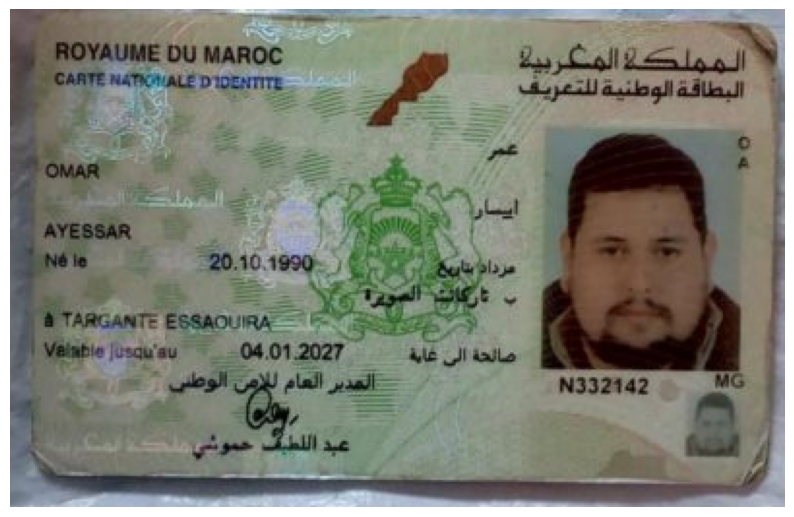

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(plt.imread(img_fns[2]))
ax.axis('off')
plt.show()

In [ ]:
!pip install easyocr

# Method 2 : easyOCR

In [ ]:
import easyocr

reader = easyocr.Reader(['en'],gpu = False)
results = reader.readtext(img_fns[2])


In [ ]:
results[0]

([[2, 12], [198, 12], [198, 38], [2, 38]],
 'ROYAUME DU MAROC',
 0.5262022348191301)

In [51]:
pd.DataFrame(results)

0                   1  \
0         [[21, 15], [143, 15], [143, 31], [21, 31]]    ROYAUME DU MAROC   
1       [[259, 14], [382, 14], [382, 38], [259, 38]]               IASLI   
2           [[22, 32], [62, 32], [62, 40], [22, 40]]              CaAIHE   
3       [[104, 34], [140, 34], [140, 42], [104, 42]]              WDz4nt   
4       [[260, 31], [383, 31], [383, 51], [260, 51]]         ChaubslalJI   
5           [[17, 77], [49, 77], [49, 91], [17, 91]]                OMAR   
6       [[15, 109], [65, 109], [65, 123], [15, 123]]             AYESSAR   
7   [[101, 125], [159, 125], [159, 139], [101, 139]]          20.10.1920   
8     [[27, 155], [139, 155], [139, 169], [27, 169]]  TARGANTE ESSAQUIRA   
9       [[42, 172], [86, 172], [86, 180], [42, 180]]            InMrOuia   
10  [[117, 171], [175, 171], [175, 185], [117, 185]]          04.01.2027   
11  [[203, 173], [263, 173], [263, 187], [203, 187]]              4 JIWL   
12  [[280, 186], [333, 186], [333, 203], [280, 203]]             N3J2142   

           2  
0   0.834862  
1   0.057151  
2   0.101001  
3   0.041303  
4   0.024959  
5   0.360886  
6   0.926201  
7   0.425856  
8   0.555222  
9   0.011113  
10  0.847953  
11  0.125858  
12  0.630003

# Method 3 : Keras_ocr

In [ ]:
!pip install keras-ocr

In [ ]:
import keras_ocr

pipeline = keras_ocr.pipeline.Pipeline()

In [ ]:
results =pipeline.recognize([img_fns[2]])

In [42]:
pd.DataFrame(results[0])

0                                                  1
0         royaune  [[22.0, 16.0], [79.0, 16.0], [79.0, 29.0], [22...
1              du  [[80.0, 17.0], [98.0, 17.0], [98.0, 30.0], [80...
2           enrco  [[260.3766, 18.531174], [315.7881, 15.7606], [...
3           maroc  [[99.0, 18.0], [143.0, 18.0], [143.0, 31.0], [...
4           gslos  [[316.23157, 16.71522], [382.63214, 20.30444],...
5           cante  [[22.0, 31.0], [50.0, 31.0], [50.0, 41.0], [22...
6   naoaleddennin  [[50.043453, 31.000944], [142.17383, 33.003777...
7              en  [[260.71536, 35.036705], [305.93558, 33.744698...
8           sibgl  [[304.07382, 34.712063], [345.3212, 36.04262],...
9           aauon  [[343.0, 35.0], [381.0, 35.0], [381.0, 48.0], ...
10           onar  [[17.105156, 77.6866], [47.40619, 79.06392], [...
11        ayessan  [[16.0, 109.0], [63.0, 109.0], [63.0, 120.0], ...
12             no  [[16.0, 125.0], [31.0, 125.0], [31.0, 135.0], ...
13             20  [[101.0, 125.0], [116.0, 125.0], [116.0, 136.0...
14             10  [[117.0, 125.0], [131.0, 125.0], [131.0, 136.0...
15              c  [[31.0, 126.0], [41.0, 126.0], [41.0, 135.0], ...
16           1990  [[131.0, 126.0], [157.0, 126.0], [157.0, 136.0...
17            cau  [[217.87997, 130.16], [239.57999, 127.06], [24...
18            pds  [[240.0, 130.0], [261.0, 130.0], [261.0, 139.0...
19       tangante  [[25.0, 155.0], [78.0, 155.0], [78.0, 166.0], ...
20       essaouna  [[79.0, 156.0], [135.0, 156.0], [135.0, 167.0]...
21         vanele  [[16.087147, 170.73413], [50.30576, 172.05023]...
22             oa  [[118.0, 171.0], [132.0, 171.0], [132.0, 182.0...
23             01  [[132.0, 171.0], [146.0, 171.0], [146.0, 183.0...
24           2027  [[147.0, 171.0], [174.0, 171.0], [174.0, 184.0...
25           usqu  [[49.0, 173.0], [76.0, 173.0], [76.0, 182.0], ...
26             cu  [[74.0, 174.0], [87.0, 174.0], [87.0, 182.0], ...
27            cle  [[205.0, 175.0], [222.0, 175.0], [222.0, 183.0...
28           aule  [[237.0, 175.0], [262.0, 175.0], [262.0, 184.0...
29              s  [[222.0, 176.0], [236.0, 176.0], [236.0, 185.0...
30           slal  [[139.05737, 188.63116], [162.86066, 186.46722...
31             mg  [[362.0, 187.0], [380.0, 187.0], [380.0, 197.0...
32           cest  [[81.0, 188.0], [114.0, 188.0], [114.0, 199.0]...
33             pa  [[161.96944, 191.27075], [189.67686, 187.57642...
34        ni32142  [[282.0, 189.0], [331.0, 189.0], [331.0, 200.0...
35           siul  [[129.0, 216.0], [161.0, 216.0], [161.0, 230.0...
36             sc  [[161.0, 222.0], [176.0, 222.0], [176.0, 231.0...

<Axes: >

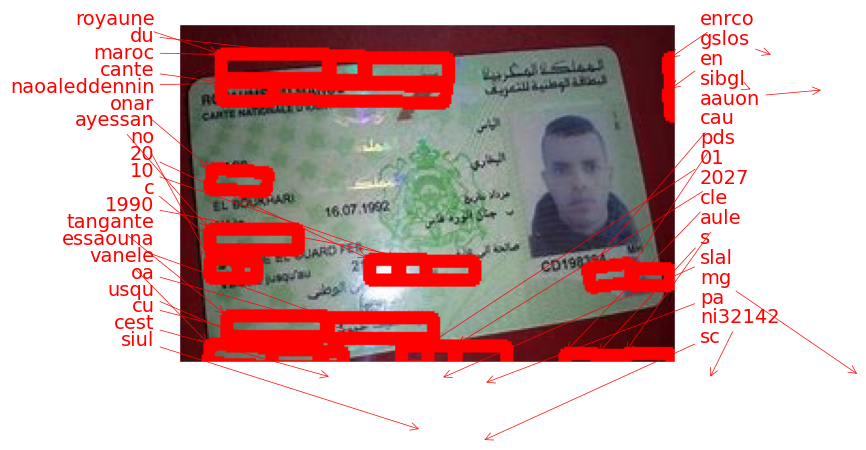

In [48]:
plt.subplots(10,)
keras_ocr.tools.drawAnnotations(plt.imread(img_fns[7]), results[0])

## Compare EasyOCR vs KerasOcr

In [ ]:
# (easyocr)
reader = easyocr.Reader(['en'], gpu = False)

dfs = []
for img in tqdm(img_fns[:8]):
   result = reader.readtext(img)
   img_id = img.split('/')[-1].split('.')[0]
   img_df = pd.DataFrame(results)
   img_df['img_id'] = img_id
   dfs.append(img_df)
easyocr_df = pd.concat(dfs)

In [62]:
results[0]

[('catsae',
  array([[171.25293 ,  20.288239],
         [226.69409 ,  16.023525],
         [227.49408 ,  26.423523],
         [172.05292 ,  30.688236]], dtype=float32)),
 ('l',
  array([[160.,  22.],
         [171.,  22.],
         [171.,  31.],
         [160.,  31.]], dtype=float32)),
 ('sien',
  array([[176.41583 ,  31.716024],
         [228.53754 ,  24.608519],
         [229.80325 ,  33.890465],
         [177.68155 ,  40.99797 ]], dtype=float32)),
 ('caroc',
  array([[59.66063 , 30.873306],
         [88.97511 , 29.477379],
         [89.42534 , 38.93213 ],
         [60.110855, 40.328056]], dtype=float32)),
 ('ou',
  array([[48., 32.],
         [61., 32.],
         [61., 41.],
         [48., 41.]], dtype=float32)),
 ('noyaune',
  array([[ 9.392676, 35.408585],
         [48.860092, 32.25119 ],
         [49.623207, 41.79014 ],
         [10.155792, 44.947533]], dtype=float32)),
 ('dsn',
  array([[67., 42.],
         [83., 42.],
         [83., 46.],
         [67., 46.]], dtype=float32)),


In [75]:
easyocr_df

0                   1  \
0         [[21, 15], [143, 15], [143, 31], [21, 31]]    ROYAUME DU MAROC   
1       [[259, 14], [382, 14], [382, 38], [259, 38]]               IASLI   
2           [[22, 32], [62, 32], [62, 40], [22, 40]]              CaAIHE   
3       [[104, 34], [140, 34], [140, 42], [104, 42]]              WDz4nt   
4       [[260, 31], [383, 31], [383, 51], [260, 51]]         ChaubslalJI   
..                                               ...                 ...   
8     [[27, 155], [139, 155], [139, 169], [27, 169]]  TARGANTE ESSAQUIRA   
9       [[42, 172], [86, 172], [86, 180], [42, 180]]            InMrOuia   
10  [[117, 171], [175, 171], [175, 185], [117, 185]]          04.01.2027   
11  [[203, 173], [263, 173], [263, 187], [203, 187]]              4 JIWL   
12  [[280, 186], [333, 186], [333, 203], [280, 203]]             N3J2142   

           2                                        img_id  
0   0.834862  desktop_357fc9f6-5f43-4aa7-ae22-4cc6e318e306  
1   0.057151  desktop_357fc9f6-5f43-4aa7-ae22-4cc6e318e306  
2   0.101001  desktop_357fc9f6-5f43-4aa7-ae22-4cc6e318e306  
3   0.041303  desktop_357fc9f6-5f43-4aa7-ae22-4cc6e318e306  
4   0.024959  desktop_357fc9f6-5f43-4aa7-ae22-4cc6e318e306  
..       ...                                           ...  
8   0.555222                               télécharger (1)  
9   0.011113                               télécharger (1)  
10  0.847953                               télécharger (1)  
11  0.125858                               télécharger (1)  
12  0.630003                               télécharger (1)  

[104 rows x 4 columns]

In [57]:
img.split('/')[-1].split('.')[0]

'télécharger (1)'

In [ ]:
%%time
# Keras_ocr
pipeline = keras_ocr.pipeline.Pipeline()


dfs = []
for img in tqdm(img_fns[:8]):
   results = pipeline.recognize([img])
   result = results[0]
   img_id = img.split('/')[-1].split('.')[0]
   img_df = pd.DataFrame(results)
   img_df['img_id'] = img_id
   dfs.append(img_df)
kerasocr_df = pd.concat(dfs)




